# Welcome back! Featuring ggplot and Newton
---
by: John Muchovej \([@ionlights](github.com/ionlights/)\), Evan Waldmann \([@Waldmannly](github.com/Waldmannly/)\), on 08 Aug 2018


## Welcome to SIGAI

### What is it?

### Who are we?

### Our goals:

## The Master Plan (for Fall 2018)

## Get a Taste of Python and Plotting

In order to understand what your data is and how dirty is it (because all data is dirty), you need to understand what that data looks like. Through plotting you can easily see trends and outliers that will help you determine if your data is what you think it is. 

First things first, you have to download your find what package your comfortable with there are loads, so feel free to look around. For the purposes of this meeting we are going to be using plotnine because it is basically the same as ggplot2 from R which is a very powerful library that is widely used in many different fields (there is a ggplot package as well, but that was giving me some issues).

If you take a look at [`fa18.env.yml`][fa18-env], you'll find the Anaconda Environment (very similar to `pip virtualenv`) we'll be using for the semester &ndash; you don't need to worry about this for the semester, though.

Then you have to import the libraries and read in your data. 

[fa18-env]: https://github.com/ucfsigai/data-science/blob/master/fa18/fa18.env.yml

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


So now we have our data. We also want our data in this format, which is normal referred to as a data frame. Each row is an entry of data and each column is a type of data that was collected. With this, we can now start graphing. 

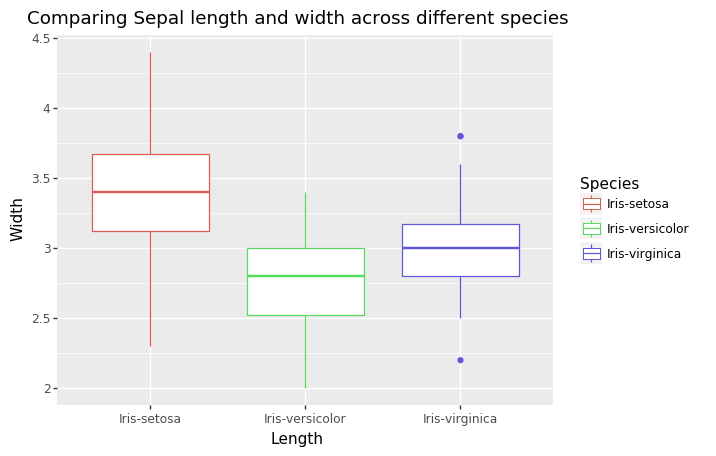

<ggplot: (304483350)>

In [3]:
ggplot(aes(x='Species', y='SepalWidthCm', color='Species'), data=df) + \
    geom_boxplot(aes(color='Species')) + \
    xlab("Length") + \
    ylab("Width") + \
    ggtitle("Comparing Sepal length and width across different species")

You can that we can get some nice looking graphs very easily. But what if we wanted to customized them more? 

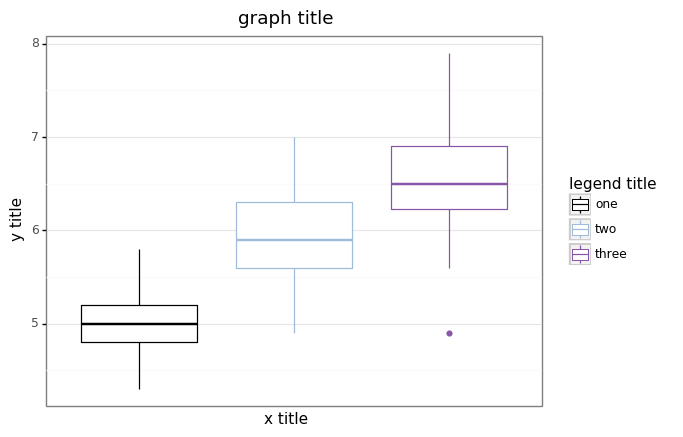

<ggplot: (-9223372036548095239)>

In [4]:
(ggplot(df, aes('Species','SepalLengthCm')) + 
    geom_boxplot(aes(color=('Species'))) +
    labs(title='graph title', x='x title', color='legend title', y='y title') +
    scale_x_discrete(breaks= ['setosa', 'versicolor', 'virginica'], labels= ['one', 'two', 'three']) + 
    scale_color_manual(labels=['one', 'two', 'three'], values=['#000000', '#9ebcda', '#8856a7'])
    + theme_bw())

The customization is also pretty easy, but one of the things that most non statistician love about R is that they can add a fitted linear model line with about 25 characters. 

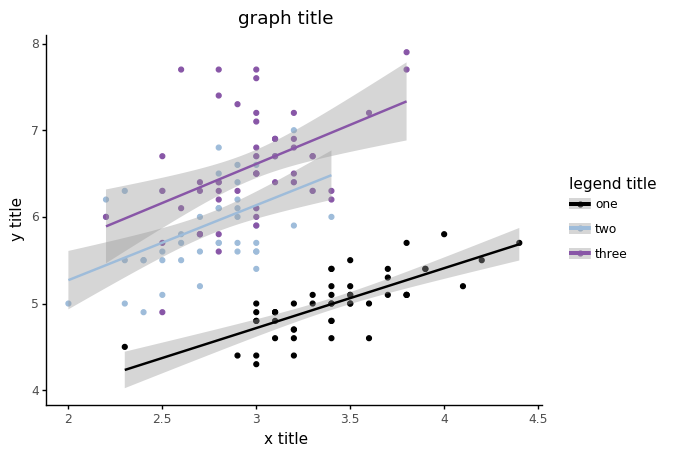

<ggplot: (-9223372036547956522)>

In [5]:
(ggplot(df, aes(x='SepalWidthCm', y='SepalLengthCm', color=('Species'))) +
    geom_point() + stat_smooth(method='lm') +
    labs(title="graph title", x="x title", color="legend title", y="y title") +
    scale_color_manual(labels=['one', 'two', 'three'], values=['#000000', '#9ebcda', '#8856a7']) +
    theme_classic())

Sometimes, seperating the data by category can help you understand the trends better. This is called faceting. Note that since ggplot started in R changing the names of individual graphs is somewhat hard; an easy work around for this is to change the string factors in the data since the names depend on the species names from data.

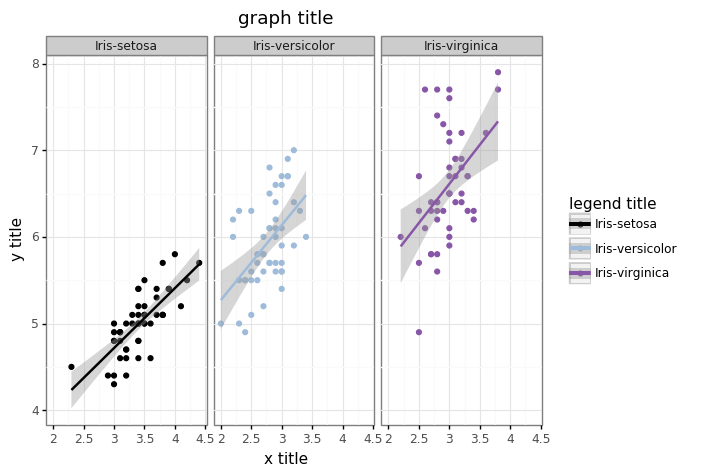

<ggplot: (306827163)>

In [6]:
(ggplot(df, aes(x='SepalWidthCm', y='SepalLengthCm', color=('Species'))) + 
    geom_point() + stat_smooth(method='lm') + facet_wrap('~Species') +
    labs(title="graph title", x="x title", color="legend title", y="y title") + 
    scale_color_manual(values=['#000000', '#9ebcda', '#8856a7']) +
    theme_bw())

Now lets try a different dataset. 

In [7]:
pkdata = pd.read_csv('pokemon.csv')
pkdata.rename(lambda x: str(x).replace(" ", ""), axis="columns", inplace=True)
pkdata.head()

,#,Name,Type1,Type2,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


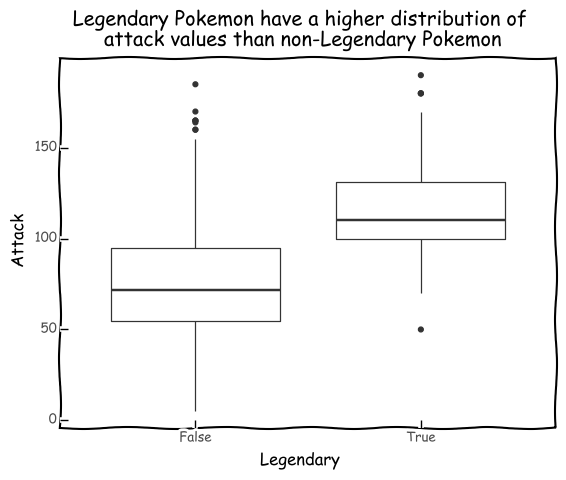

<ggplot: (306926414)>

In [8]:
(ggplot(pkdata, aes('Legendary', 'Attack')) + geom_boxplot() +
    labs(title='Legendary Pokemon have a higher distribution of\n attack values than non-Legendary Pokemon') +
    theme_xkcd())

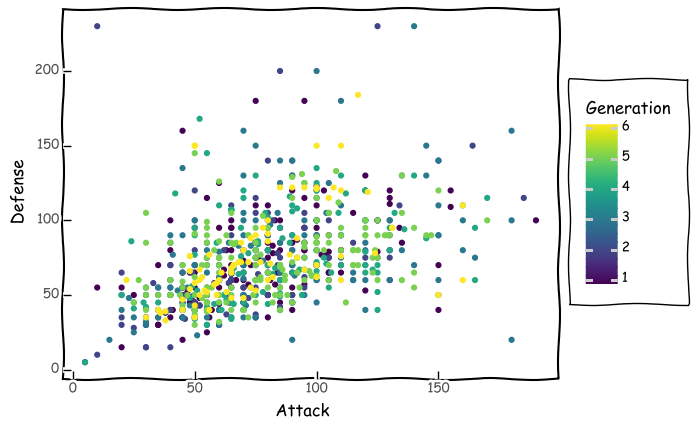

<ggplot: (-9223372036547955112)>

In [9]:
(ggplot(pkdata, aes('Attack', 'Defense', color="Generation")) +
    geom_point() +
    theme_xkcd())

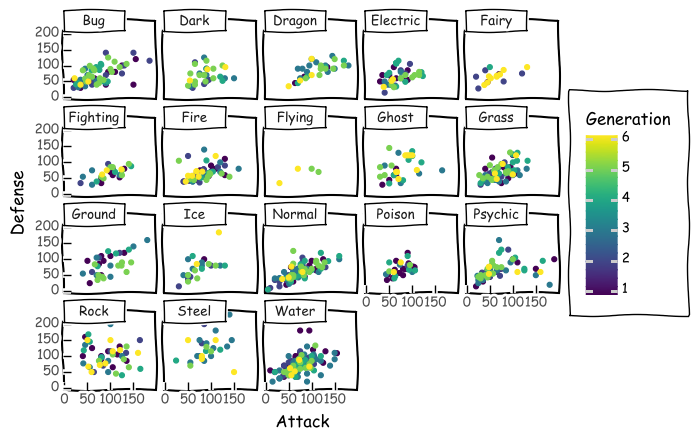

<ggplot: (-9223372036547572164)>

In [10]:
(ggplot(pkdata, aes('Attack', 'Defense', color="Generation")) +
    geom_point() + facet_wrap('~Type1') +
    theme_xkcd())

In [13]:
(ggplot(pkdata, aes('Legendary',  'Total')) + geom_boxplot() +
    labs(title='Sum of Total Stats Separated by\n Type and Legendary Status') +
    facet_wrap('~Type1') +
    theme_xkcd())

PlotnineError: "Could not evaluate the 'y' mapping: 'Total' (original error: name 'Total' is not defined)"

Now what if we wanted to save this graph? 

In [12]:
p = (ggplot(pkdata, aes('Legendary', 'Total')) + geom_boxplot() +
     labs(title='Sum of Total Stats Separated by\n Type and Legendary Status') +
     facet_wrap('~Type1') + 
     theme_xkcd())

p.save(filename='pokemanPlot.png', height=5, width=5, units='in', dpi=150)

/Users/john/.anaconda3/envs/sigai-fa18/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 5 x 5 in image.
  from_inches(height, units), units))
/Users/john/.anaconda3/envs/sigai-fa18/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: pokemanPlot.png
  warn('Filename: {}'.format(filename))


PlotnineError: "Could not evaluate the 'y' mapping: 'Total' (original error: name 'Total' is not defined)"

Now you have the basics of graphing. Keep in mind that this library translates almost exactly into code for `ggplot2` in `R`. If you want to refine your skills, the best thing you can do is to find a graph that you think is cool and try to make it exactly. Doing this, you will quickly learn the quarks of `ggplot`. 


You can check out these links for more information on plotnine: 
- https://www.kaggle.com/residentmario/grammar-of-graphics-with-plotnine-optional?scriptVersionId=4327772
- http://pltn.ca/plotnine-superior-python-ggplot/

And you can check out these for some more help with graphing using `ggplot`:
- https://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html
- http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html

## Accessing Newton